In [14]:
import numpy as np
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



In [18]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# After uploading, you can load the data
import pandas as pd
import io

try:
    df = pd.read_csv(io.StringIO(uploaded['housing.csv'].decode('utf-8')), sep='\s+', header=None)
    print(df.head())

    # Original code from cell 0c561502
    if df.shape[1] == 14:
        column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
                         'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
        df.columns = column_names
    else:
        print(f'Unexpected number of columns: {df.shape}. First row:', df.iloc[0].tolist())
        raise ValueError('Data shape does not match expected format.')

except KeyError:
    print("Error: 'housing.csv' not found. Please make sure you uploaded the correct file.")
except Exception as e:
    print(f"An error occurred: {e}")

Saving housing.csv to housing (1).csv
User uploaded file "housing (1).csv" with length 49082 bytes
Error: 'housing.csv' not found. Please make sure you uploaded the correct file.


In [19]:
# Pre_processing

print('\nFirst 5 rows of the dataset:')
print(df.head())



First 5 rows of the dataset:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [20]:
print('\nDataset Information:')
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


In [21]:
print('\nMissing Values in the Dataset:')
print(df.isnull().sum())


Missing Values in the Dataset:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [22]:
df = df.dropna() #droping the missing data

In [23]:
# Data Preparation

X = df.drop('MEDV', axis=1)
y = df['MEDV']

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [28]:
#Train model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
#Evaluation

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'\nR^2 Score of the Linear Regression Model: {r2:.4f}')


R^2 Score of the Linear Regression Model: 0.6688


In [30]:
# Residuals

residuals = y_test - y_pred

In [31]:
residuals

,MEDV
173,-5.396724
274,-3.625565
491,-1.216944
72,-2.231979
452,-2.669880
...,...
412,18.064237
436,-4.084867
411,1.016403
86,0.223780


/usr/local/lib/python3.11/dist-packages/matplotlib/collections.py:1008: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


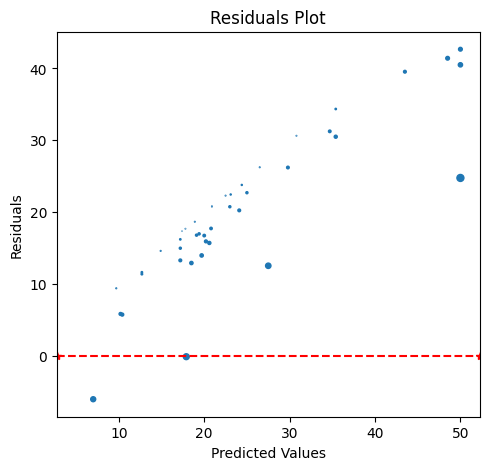

In [32]:
# Plot using matplotlib

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.axhline(y=0, color='r', linestyle='--', marker='*')

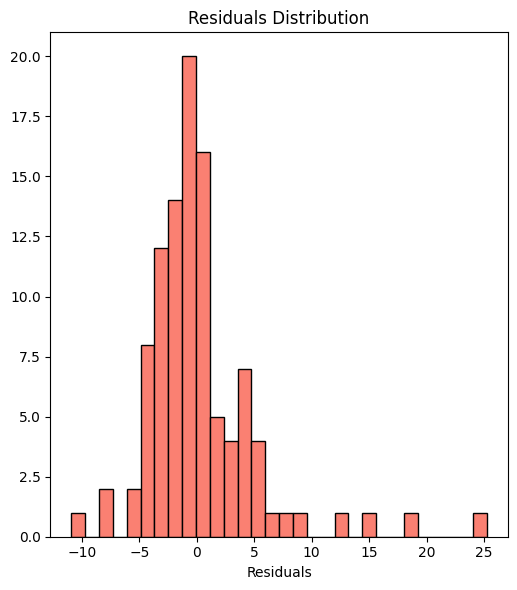

In [33]:
# plot using seaborn

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 2)
plt.hist(residuals, bins=30, edgecolor='k',color='salmon')
plt.xlabel('Residuals')
plt.title('Residuals Distribution')
plt.tight_layout()
plt.show()

In [34]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score,
                           recall_score, f1_score,
                           confusion_matrix, roc_curve, auc)
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [39]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# After uploading, you can load the data
import pandas as pd
import io

try:
    ds = pd.read_csv(io.StringIO(uploaded['tested.csv'].decode('utf-8')))
    print(ds.head())

except KeyError:
    print("Error: 'tested.csv' not found. Please make sure you uploaded the correct file.")
except Exception as e:
    print(f"An error occurred: {e}")

Saving tested.csv to tested.csv
User uploaded file "tested.csv" with length 29474 bytes
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S 

In [40]:
# Data Preprocessing

print('\nFirst 5 rows of the Titanic dataset:')
print(df.head())


First 5 rows of the Titanic dataset:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [41]:
print('\nDataset Information:')
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


In [42]:
print('\Missing Values in the Titanic Dataset:')
print(df.isnull().sum())

\Missing Values in the Titanic Dataset:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [43]:
df = df.dropna()

In [52]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'

In [55]:
ds['Age'] = ds['Age'].fillna(ds['Age'].median())
ds['Fare'] = ds['Fare'].fillna(ds['Fare'].median())
ds['Embarked'] = ds['Embarked'].fillna(ds['Embarked'].mode()[0])


In [57]:
X = ds[features]
y = ds[target]

In [58]:
# Pipeline for preprocessing and model training

numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['Pclass', 'Sex', 'Embarked']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
])

In [59]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [62]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probability for ROC curve

In [63]:
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")




Model Evaluation:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


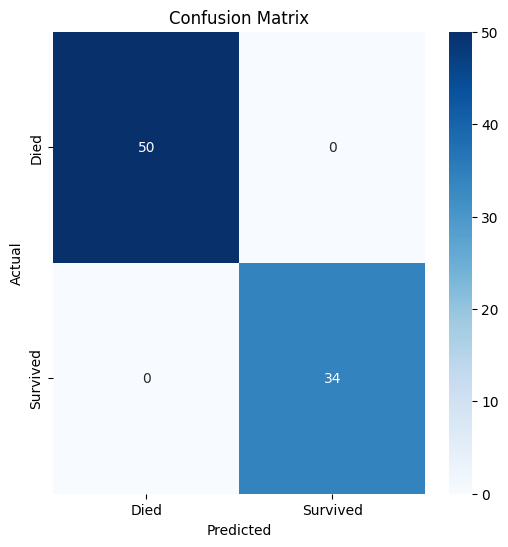

In [64]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Died', 'Survived'],
            yticklabels=['Died', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

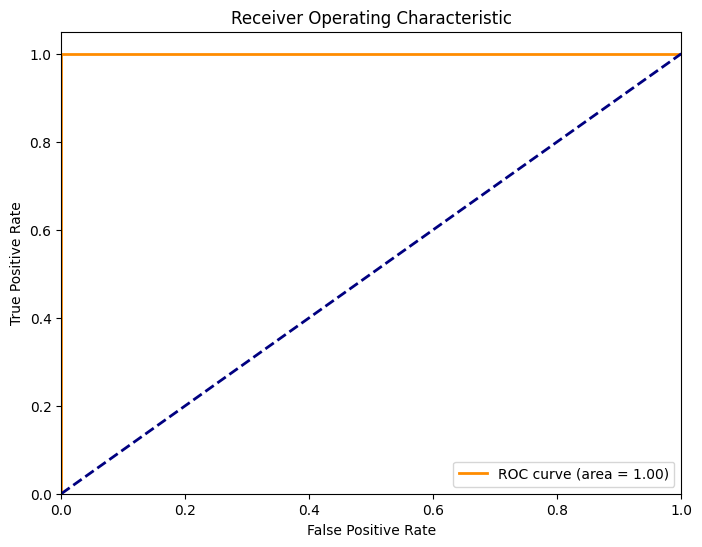

In [65]:
# ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [66]:
# Task 3 (KNN Classifier Iris Dataset)

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [67]:
iris = load_iris()
X = iris.data
y = iris.target

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
# The range of k values to test

k_values = range(1, 31)
euclidean_accuracies = []
manhattan_accuracies = []

In [70]:
# Test each K value with both distance metrics

for k in k_values:

    # Euclidean distance

    knn_euclidean = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn_euclidean.fit(X_train, y_train)
    y_pred_euclidean = knn_euclidean.predict(X_test)
    euclidean_accuracies.append(accuracy_score(y_test, y_pred_euclidean))

    # Manhattan distance

    knn_manhattan = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn_manhattan.fit(X_train, y_train)
    y_pred_manhattan = knn_manhattan.predict(X_test)
    manhattan_accuracies.append(accuracy_score(y_test, y_pred_manhattan))

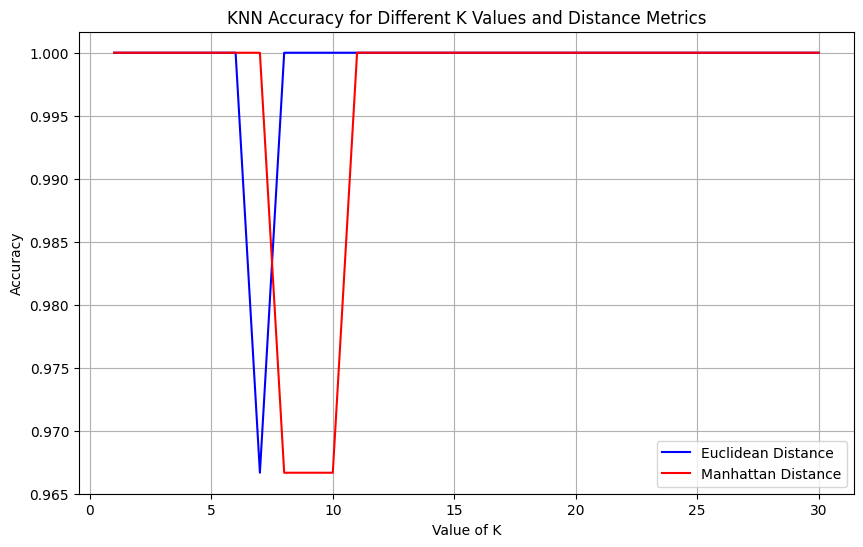

In [71]:
# Plotting the results

plt.figure(figsize=(10, 6))
plt.plot(k_values, euclidean_accuracies, 'b-', label='Euclidean Distance')
plt.plot(k_values, manhattan_accuracies, 'r-', label='Manhattan Distance')
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different K Values and Distance Metrics')
plt.legend()
plt.grid(True)
plt.show()

In [72]:
# Find the best K value for each distance metric

best_k_euclidean = k_values[np.argmax(euclidean_accuracies)]
best_k_manhattan = k_values[np.argmax(manhattan_accuracies)]

In [73]:
print(f"Best K with Euclidean distance: {best_k_euclidean} (Accuracy: {max(euclidean_accuracies):.4f})")
print(f"Best K with Manhattan distance: {best_k_manhattan} (Accuracy: {max(manhattan_accuracies):.4f})")

Best K with Euclidean distance: 1 (Accuracy: 1.0000)
Best K with Manhattan distance: 1 (Accuracy: 1.0000)


In [74]:
# Task 4 (SVM Classifier)

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import svm


In [75]:
iris = load_iris()
X = iris.data
y = iris.target

In [76]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
# SVM with different kernels

# Linear Kernel

svm_linear = svm.SVC(kernel='linear', C=1.0, random_state=42)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

In [79]:
# RBF Kernel

svm_rbf = svm.SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

In [80]:
# Evaluate the models
print('\nSVM Linear Kernel Classification Report:')
print(classification_report(y_test, y_pred_linear, target_names=iris.target_names))


SVM Linear Kernel Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [81]:
print('\nSVM RBF Kernel Classification Report:')
print(classification_report(y_test, y_pred_rbf, target_names=iris.target_names))


SVM RBF Kernel Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [82]:
# Compare with KNN

# using best KNN from previous task 3 (k=5)

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [83]:
print('n\nKNN Classification Report:')
print(classification_report(y_test, y_pred_knn, target_names=iris.target_names))

n
KNN Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [84]:
# Decision Boundary Visualization

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d, y, test_size=0.3, random_state=42)

In [85]:
# Train model

svm_linear_2d = svm.SVC(kernel='linear', C=1.0, random_state=42)
svm_linear_2d.fit(X_train_2d, y_train_2d)

SVC(kernel='linear', random_state=42)

In [86]:
svm_rbf_2d = svm.SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_rbf_2d.fit(X_train_2d, y_train_2d)

SVC(random_state=42)

In [87]:
# Meshgrid for decision boundary

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

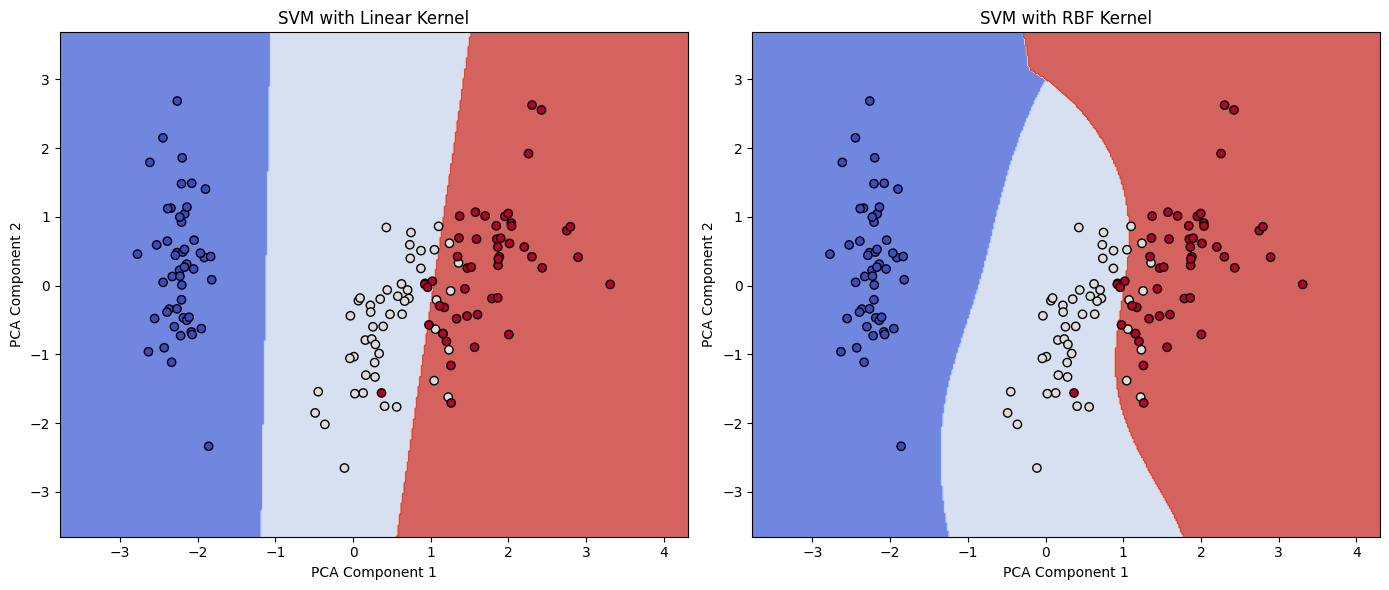

In [88]:
# Plot decision boundaries

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
xx, yy = make_meshgrid(X_2d[:, 0], X_2d[:, 1])

# Linear kernel plot

plot_contours(ax1, svm_linear_2d, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax1.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
ax1.set_title('SVM with Linear Kernel')
ax1.set_xlabel('PCA Component 1')
ax1.set_ylabel('PCA Component 2')

# RBF kernel plot

plot_contours(ax2, svm_rbf_2d, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax2.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
ax2.set_title('SVM with RBF Kernel')
ax2.set_xlabel('PCA Component 1')
ax2.set_ylabel('PCA Component 2')

plt.tight_layout()
plt.show()


In [89]:
# Task 5 (Cross Validation and Hyperparameter Tuning)

from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [91]:
iris = load_iris()
X = iris.data
y = iris.target

In [92]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [94]:
# KNN Hyperparameter Tuning

knn = KNeighborsClassifier()

In [95]:
# Parametre distribution for KNN

knn_param_dist = {
    'n_neighbors': np.arange(1, 30),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2, 3]  # Minkowski power parameter
}



In [96]:
# Randomized Search for KNN

knn_random = RandomizedSearchCV(
    estimator=knn,
    param_distributions=knn_param_dist,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1  # Use all available cores
)

In [97]:
knn_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=50, n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                                        'p': [1, 2, 3],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='accuracy')

In [98]:
# SVM Hyperparameter Tuning

svm = SVC()

In [99]:
# Define the parameter distribution for SVM

svm_param_dist = {
    'C': np.logspace(-2, 10, 13),  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'] + list(np.logspace(-5, 2, 8)),  # Kernel coefficient
    'degree': [2, 3, 4, 5],  # For polynomial kernel
    'coef0': np.linspace(-1, 1, 5)  # For polynomial kernel
}

In [100]:
# Randomized Search for SVM

svm_random = RandomizedSearchCV(
    estimator=svm,
    param_distributions=svm_param_dist,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)


In [104]:
svm_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=50, n_jobs=-1,
                   param_distributions={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10]),
                                        'coef0': array([-1. , -0.5,  0. ,  0.5,  1. ]),
                                        'degree': [2, 3, 4, 5],
                                        'gamma': ['scale', 'auto',
                                                  np.float64(1e-05),
                                                  np.float64(0.0001),
                                                  np.float64(0.001),
                                                  np.float64(0.01),
                                                  np.float64(0.1),
                                                  np.float64(1.0),
                                                  np.float64(10.0),
                                                  np.float64(100.0)],
                                        'kernel': ['linear', 'rbf', 'poly']},
                   random_state=42, scoring='accuracy')

In [105]:
# Results

print("KNN Best Parameters:", knn_random.best_params_)
print("KNN Best Cross-validated Accuracy: {:.4f}".format(knn_random.best_score_))
print("\nSVM Best Parameters:", svm_random.best_params_)
print("SVM Best Cross-validated Accuracy: {:.4f}".format(svm_random.best_score_))

KNN Best Parameters: {'weights': 'distance', 'p': 3, 'n_neighbors': np.int64(19), 'metric': 'minkowski'}
KNN Best Cross-validated Accuracy: 0.9667

SVM Best Parameters: {'kernel': 'linear', 'gamma': np.float64(1e-05), 'degree': 4, 'coef0': np.float64(0.5), 'C': np.float64(1000000.0)}
SVM Best Cross-validated Accuracy: 0.9583


In [106]:
# Evaluation on Test Set

best_knn = knn_random.best_estimator_
best_svm = svm_random.best_estimator_

print("\nKNN Test Accuracy: {:.4f}".format(best_knn.score(X_test, y_test)))
print("SVM Test Accuracy: {:.4f}".format(best_svm.score(X_test, y_test)))



KNN Test Accuracy: 1.0000
SVM Test Accuracy: 1.0000


In [107]:
# Compare with default parameters

default_knn = KNeighborsClassifier().fit(X_train, y_train)
default_svm = SVC().fit(X_train, y_train)

print("\nDefault KNN Test Accuracy: {:.4f}".format(default_knn.score(X_test, y_test)))
print("Default SVM Test Accuracy: {:.4f}".format(default_svm.score(X_test, y_test)))


Default KNN Test Accuracy: 1.0000
Default SVM Test Accuracy: 1.0000


In [112]:
# Task 6 (Bayesian Optimization)

import numpy as np
from sklearn import svm, datasets
from sklearn.model_selection import cross_val_score
from skopt import gp_minimize
from skopt.space import Real, Integer, Categorical
from skopt.utils import use_named_args
import matplotlib.pyplot as plt



In [113]:
iris = load_iris()
X = iris.data
y = iris.target

In [114]:
# Define the parameter distribution for SVM

space = [
    Real(1e-6, 1e+6, prior='log-uniform', name='C'),
    Real(1e-6, 1e+1, prior='log-uniform', name='gamma'),
    Categorical(['linear', 'rbf', 'poly'], name='kernel'),
    Integer(1, 5, name='degree')  # Only used by polynomial kernel
]


In [115]:
# Define the objective function to minimize (negative accuracy)

@use_named_args(space)
def objective(**params):

    # Remove degree parameter if not using polynomial kernel

    if params['kernel'] != 'poly':
        params.pop('degree')

    model = svm.SVC(**params)
    return -np.mean(cross_val_score(model, X, y, cv=5, n_jobs=-1, scoring="accuracy"))


In [116]:
# Run Bayesian optimization

result = gp_minimize(
    func=objective,
    dimensions=space,
    n_calls=50,
    random_state=42,
    n_jobs=-1    # Use all available cores
)


In [117]:
# Print the best results
print(f"Best accuracy: {-result.fun:.4f}")
print("Best parameters:")
print(f"C: {result.x[0]:.4f}")
print(f"gamma: {result.x[1]:.4f}")
print(f"kernel: {result.x[2]}")
print(f"degree: {result.x[3]}")

Best accuracy: 0.9800
Best parameters:
C: 1000000.0000
gamma: 0.0000
kernel: poly
degree: 1


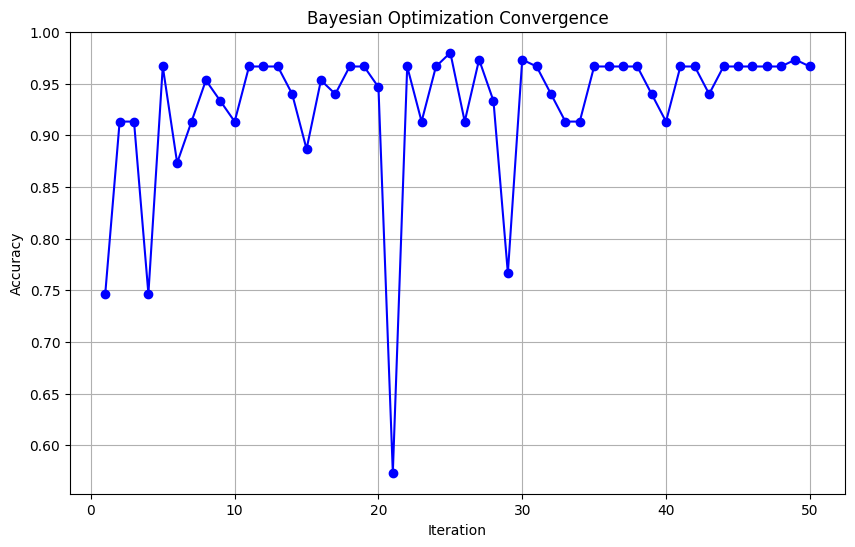

In [118]:
# Plot convergence

plt.figure(figsize=(10, 6))
plt.plot(range(1, 1+len(result.func_vals)), -result.func_vals, 'bo-')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Bayesian Optimization Convergence')
plt.grid(True)
plt.show()

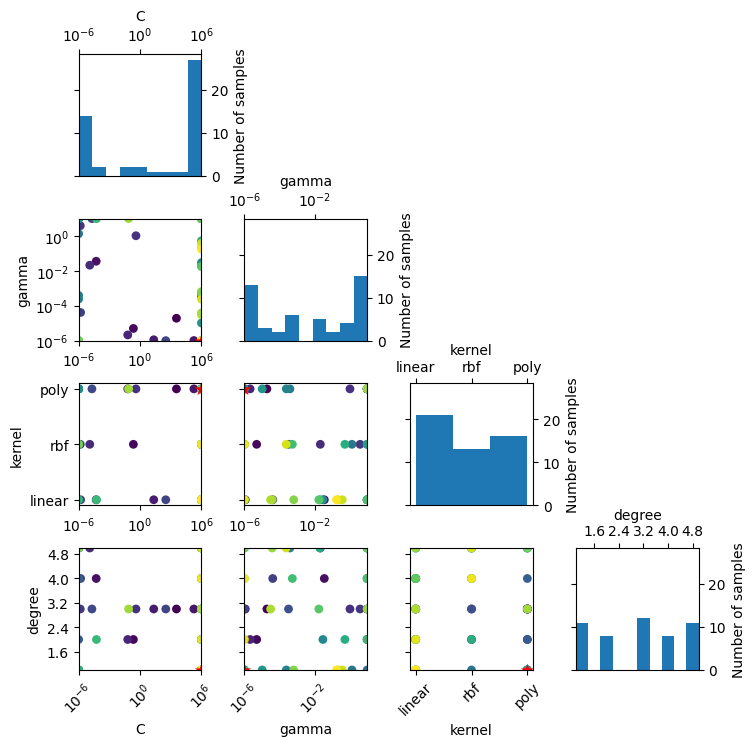

In [119]:
# Plot evaluation points

from skopt.plots import plot_evaluations
plot_evaluations(result, bins=10)
plt.show()

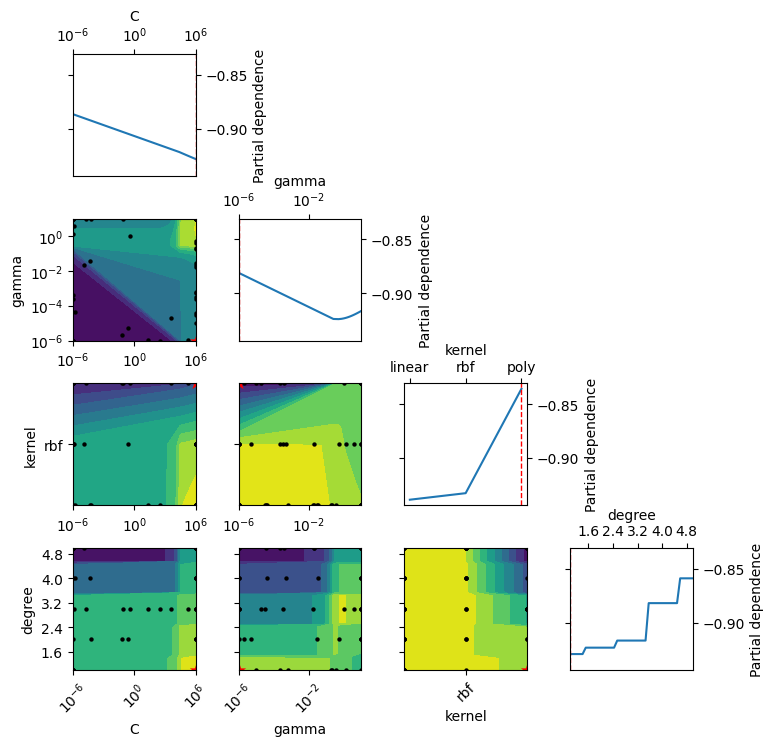

In [120]:
# Plot objective landscape (pairwise)

from skopt.plots import plot_objective
_ = plot_objective(result)
plt.show()

In [111]:
%pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 852.5 kB/s eta 0:00:00
